In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
import geopandas as gpd
import xarray as xr
import wget
import requests
import netCDF4 as nc4
from multiprocessing.pool import ThreadPool
import requests

In [6]:
datasets = ['chirps','mswep', 'xavier', 'era5', 'imerg'] #gpcc 
datasets_names = ['CHIRPS','MSWEP', 'Xavier', 'ERA5', 'IMERG'] #GPCC

In [7]:
folder_ts = r'daily_datasets\CDD'
folder_metric = r'metrics\length'


In [16]:
dataset = datasets[4]
file_path = glob(os.path.join(folder_ts, dataset + '.nc'))
ds = xr.open_dataset(file_path[0])


In [17]:
#resample to monthly, mean
ds_ts_mean = ds.where(ds.CDD >= 5).resample(time='1MS').mean(dim='time')
# resample to monthly, max
ds_ts_max = ds.where(ds.CDD >= 5).resample(time='1MS').max(dim='time')

In [22]:
#resamplt to seasonal, mean
ds_ts_mean_season = ds.where(ds.CDD >= 5).resample(time='QS-DEC').mean(dim='time')


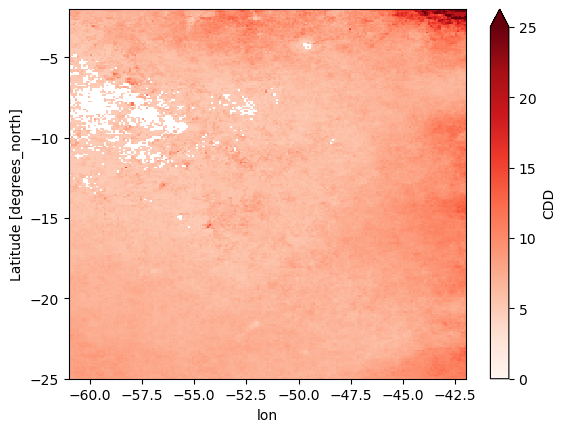

In [24]:
ds_ts_mean_season.sel(time=ds_ts_mean_season['time.season']=='DJF').mean(dim='time').CDD.plot(cmap='Reds', vmin=0, vmax=25)

In [ ]:
#for dataset in datasets:
#    #read file of dataset in folder_clean
#    file_path = glob(os.path.join(folder_ts, dataset + '.nc'))
#    ds = xr.open_dataset(file_path[0])
#    ds_ts = ds.groupby('time.year').mean('time')
#    #pr times 12
#    ds_ts['pr'] = ds_ts['pr'] * 12
#    ds_clim = ds_ts.mean('year')
#    ds_trend =  ds_kendall(ds_ts, 'year')
#    #save
#    ds_ts.to_netcdf(os.path.join(folder_metric, dataset + '.nc'))
#    ds_clim.to_netcdf(os.path.join(folder_metric,'clim', dataset + '.nc'))
#    ds_trend.to_netcdf(os.path.join(folder_metric,'trend', dataset + '.nc'))